## TRUE/FALSE SPLITTING

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

In [27]:
data = {
    "x" : np.arange(10),
    "y" : np.arange(10) + np.random.randn(10)
}
df = pd.DataFrame(data)
df

,x,y
0,0,0.174526
1,1,-0.817408
2,2,1.501409
3,3,3.176468
4,4,3.561210
5,5,4.033126
6,6,7.422461
7,7,6.331889
8,8,6.997755
9,9,8.187482


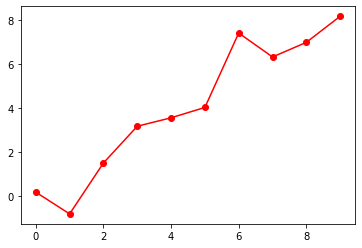

In [28]:
plt.plot(df["x"], df["y"], "ro-")

#### Linear Regression Train w/ All Data

In [29]:
model = LinearRegression()
model.fit(df[["x"]], df["y"])
print("slope m = ", model.coef_)
print("intercept c = ", model.intercept_)

slope m =  [0.99506088]
intercept c =  -0.42088220988449


   x         y     y'all
0  0  0.174526 -0.420882
1  1 -0.817408  0.574179
2  2  1.501409  1.569240
3  3  3.176468  2.564300
4  4  3.561210  3.559361
5  5  4.033126  4.554422
6  6  7.422461  5.549483
7  7  6.331889  6.544544
8  8  6.997755  7.539605
9  9  8.187482  8.534666


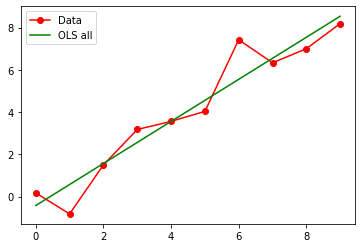

In [30]:
df["y'all"] = model.predict(df[["x"]])
print(df)
#ordinary least squares / linear regression
plt.plot(df["x"], df["y"], "ro-")
plt.plot(df["x"], df["y'all"], "g-")
plt.legend(["Data", "OLS all"])

#### Linear Regression, Train w/ Sklearn Splitting (80% Random Data)

In [31]:
x_train, x_test, y_train, y_test = tts(df[["x"]], df["y"], test_size= .2)

print(x_test)
print(y_test)

   x
5  5
0  0
5    4.033126
0    0.174526
Name: y, dtype: float64


In [32]:
model80 = LinearRegression()
model80.fit(x_train, y_train)
df["y'80"] = model80.predict(df[["x"]])
df

,x,y,y'all,y'80
0,0,0.174526,-0.420882,-0.678233
1,1,-0.817408,0.574179,0.366445
2,2,1.501409,1.569240,1.411124
3,3,3.176468,2.564300,2.455802
4,4,3.561210,3.559361,3.500480
5,5,4.033126,4.554422,4.545158
6,6,7.422461,5.549483,5.589836
7,7,6.331889,6.544544,6.634515
8,8,6.997755,7.539605,7.679193
9,9,8.187482,8.534666,8.723871


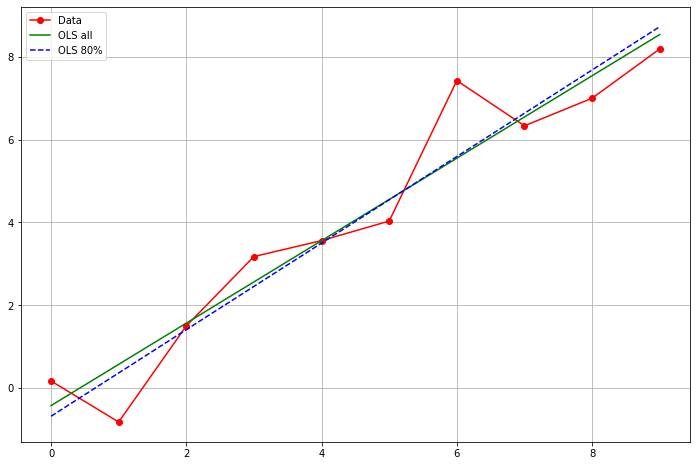

In [33]:
plt.figure(figsize= (12,8))
plt.plot(df["x"], df["y"], "ro-")
plt.plot(df["x"], df["y'all"], "g-")
plt.plot(df["x"], df["y'80"], "b--")
plt.legend(["Data", "OLS all", "OLS 80%"])
plt.grid(True)

#### Linear Regression, Train 2 data

In [37]:
model2 = LinearRegression()
model2.fit(df[["x"]].iloc[:2], df["y"].iloc[:2])
df["y'2"] = model2.predict(df[["x"]])
df

,x,y,y'all,y'80,y'2
0,0,0.174526,-0.420882,-0.678233,0.174526
1,1,-0.817408,0.574179,0.366445,-0.817408
2,2,1.501409,1.569240,1.411124,-1.809341
3,3,3.176468,2.564300,2.455802,-2.801274
4,4,3.561210,3.559361,3.500480,-3.793207
5,5,4.033126,4.554422,4.545158,-4.785141
6,6,7.422461,5.549483,5.589836,-5.777074
7,7,6.331889,6.544544,6.634515,-6.769007
8,8,6.997755,7.539605,7.679193,-7.760940
9,9,8.187482,8.534666,8.723871,-8.752874


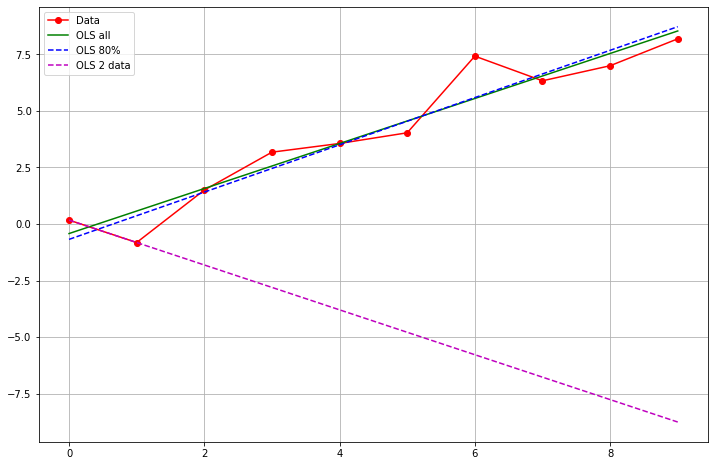

In [36]:
plt.figure(figsize= (12,8))
plt.plot(df["x"], df["y"], "ro-")
plt.plot(df["x"], df["y'all"], "g-")
plt.plot(df["x"], df["y'80"], "b--")
plt.plot(df["x"], df["y'2"], "m--")
plt.legend(["Data", "OLS all", "OLS 80%", "OLS 2 data"])
plt.grid(True)

#### Plot residual (selisih antara y dengan y')

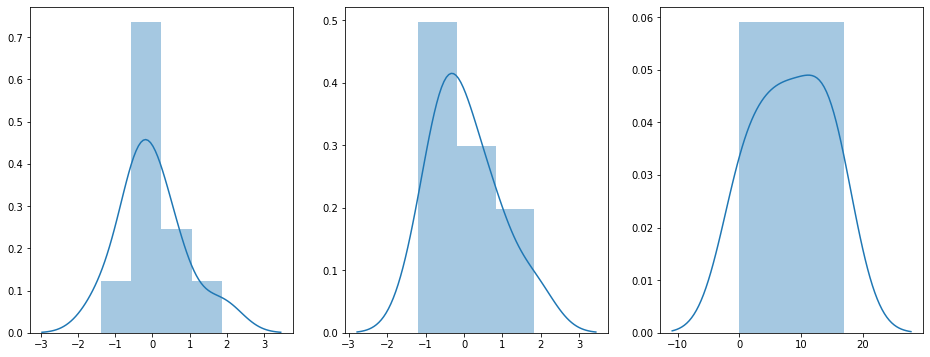

In [41]:
import seaborn as sb
plt.figure(figsize= (16,6))
plt.subplot(131)
sb.distplot(df["y"] - df["y'all"])

plt.subplot(132)
sb.distplot(df["y"] - df["y'80"])

plt.subplot(133)
sb.distplot(df["y"] - df["y'2"])

### Ridge regression

Sum Squared Error OLS = $ \sum (y - \hat{y}) ^2 $

SSE Ridge = SSE OLS $ +  \lambda . m^2$

($\lambda . m^2 $ = Nilai Penalty L2 Regularization/alpha)

In [58]:
from sklearn.linear_model import Ridge

modelR = Ridge(alpha= -.95)
modelR.fit(df[["x"]].iloc[:2], df["y"].iloc[:2])
df["y'2r"] = modelR.predict(df[["x"]])
df

,x,y,y'all,y'80,y'2,y'2r
0,0,0.174526,-0.420882,-0.678233,0.174526,-0.872515
1,1,-0.817408,0.574179,0.366445,-0.817408,0.229633
2,2,1.501409,1.569240,1.411124,-1.809341,1.331781
3,3,3.176468,2.564300,2.455802,-2.801274,2.433929
4,4,3.561210,3.559361,3.500480,-3.793207,3.536077
5,5,4.033126,4.554422,4.545158,-4.785141,4.638225
6,6,7.422461,5.549483,5.589836,-5.777074,5.740373
7,7,6.331889,6.544544,6.634515,-6.769007,6.842521
8,8,6.997755,7.539605,7.679193,-7.760940,7.944669
9,9,8.187482,8.534666,8.723871,-8.752874,9.046817


Skor alpha dicari sampai mendekati nilai y'80

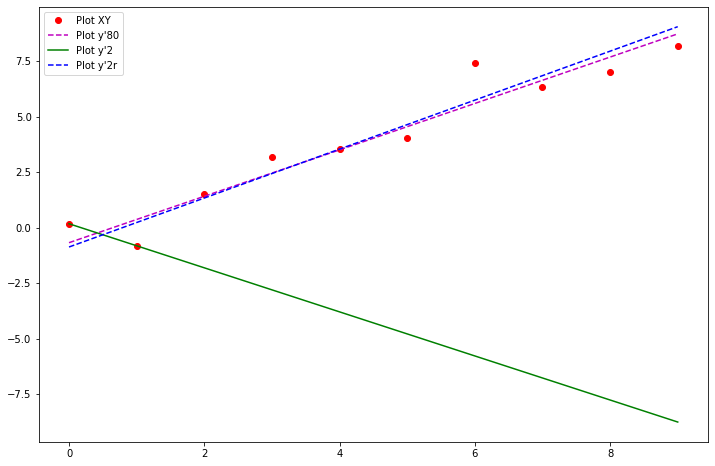

In [95]:
plt.figure(figsize= (12,8))
plt.plot(df["x"], df["y"], "ro")
plt.plot(df["x"], df["y'80"], "m--")
plt.plot(df["x"], df["y'2"], "g-")
plt.plot(df["x"], df["y'2r"], "b--")
plt.legend (["Plot XY", "Plot y'80", "Plot y'2", "Plot y'2r"])

### Lasso regression

Sum Absolute Error OLS = $ \sum |y - \hat{y}| $

SAE Lasso = SAE OLS $ + \lambda . |m|$

( $\lambda . |m| $ = Nilai Penalty L2 Regularization/alpha)

In [90]:
from sklearn.linear_model import Lasso
modelL = Lasso(alpha= 0.13)
modelL.fit(df[["x"]].iloc[:2], df["y"].iloc[:2])
df["y'2l"] = modelL.predict(df[["x"]])
df

,x,y,y'all,y'80,y'2,y'2r,y'2l
0,0,0.174526,-0.420882,-0.678233,0.174526,-0.872515,-0.085474
1,1,-0.817408,0.574179,0.366445,-0.817408,0.229633,-0.557408
2,2,1.501409,1.569240,1.411124,-1.809341,1.331781,-1.029341
3,3,3.176468,2.564300,2.455802,-2.801274,2.433929,-1.501274
4,4,3.561210,3.559361,3.500480,-3.793207,3.536077,-1.973207
5,5,4.033126,4.554422,4.545158,-4.785141,4.638225,-2.445141
6,6,7.422461,5.549483,5.589836,-5.777074,5.740373,-2.917074
7,7,6.331889,6.544544,6.634515,-6.769007,6.842521,-3.389007
8,8,6.997755,7.539605,7.679193,-7.760940,7.944669,-3.860940
9,9,8.187482,8.534666,8.723871,-8.752874,9.046817,-4.332874


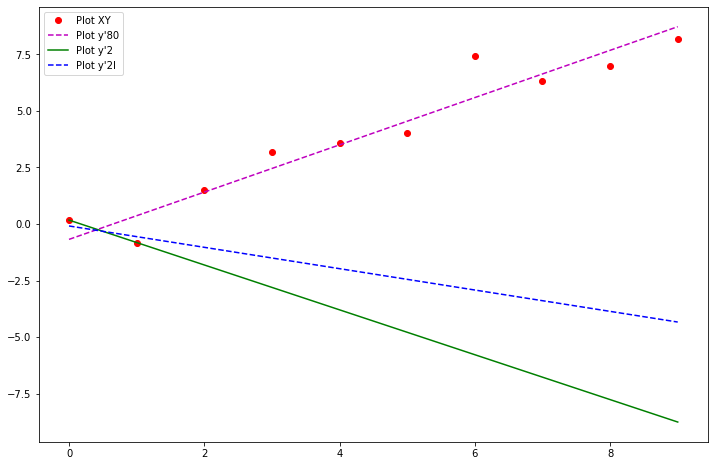

In [94]:
plt.figure(figsize= (12,8))
plt.plot(df["x"], df["y"], "ro")
plt.plot(df["x"], df["y'80"], "m--")
plt.plot(df["x"], df["y'2"], "g-")
plt.plot(df["x"], df["y'2l"], "b--")
plt.legend (["Plot XY", "Plot y'80", "Plot y'2", "Plot y'2l"])

In [97]:
from sklearn.metrics import mean_squared_error as mse

print("RMSE OLS 2", np.sqrt(mse(df["y"], df["y'2"])))
print("RMSE Ridge 2", np.sqrt(mse(df["y"], df["y'2r"])))
print("RMSE Lasso 2", np.sqrt(mse(df["y"], df["y'2l"])))

RMSE OLS 2 10.144947872309649
RMSE Ridge 2 0.8868354106844937
RMSE Lasso 2 7.596652188930625


### Elastic-Net regression

Sum Squared Error OLS = $ \sum (y - \hat{y}) ^2 $

SSE EEN = SSE OLS $ + \lambda_{ridge} . m^2 + \lambda_{lasso}. |m| $

($\lambda_{ridge} . m^2 + \lambda_{lasso}. |m| $ = Nilai Penalty L1 + L2 Regularization/alpha)

In [125]:
from sklearn.linear_model import ElasticNet
modelE = ElasticNet(alpha= -10.89)
modelE.fit(df[["x"]].iloc[:2], df["y"].iloc[:2])
df["y'2e"] = modelE.predict(df[["x"]])
df

,x,y,y'all,y'80,y'2,y'2r,y'2l,y'2e
0,0,0.174526,-0.420882,-0.678233,0.174526,-0.872515,-0.085474,-0.869370
1,1,-0.817408,0.574179,0.366445,-0.817408,0.229633,-0.557408,0.226488
2,2,1.501409,1.569240,1.411124,-1.809341,1.331781,-1.029341,1.322346
3,3,3.176468,2.564300,2.455802,-2.801274,2.433929,-1.501274,2.418204
4,4,3.561210,3.559361,3.500480,-3.793207,3.536077,-1.973207,3.514063
5,5,4.033126,4.554422,4.545158,-4.785141,4.638225,-2.445141,4.609921
6,6,7.422461,5.549483,5.589836,-5.777074,5.740373,-2.917074,5.705779
7,7,6.331889,6.544544,6.634515,-6.769007,6.842521,-3.389007,6.801637
8,8,6.997755,7.539605,7.679193,-7.760940,7.944669,-3.860940,7.897495
9,9,8.187482,8.534666,8.723871,-8.752874,9.046817,-4.332874,8.993354


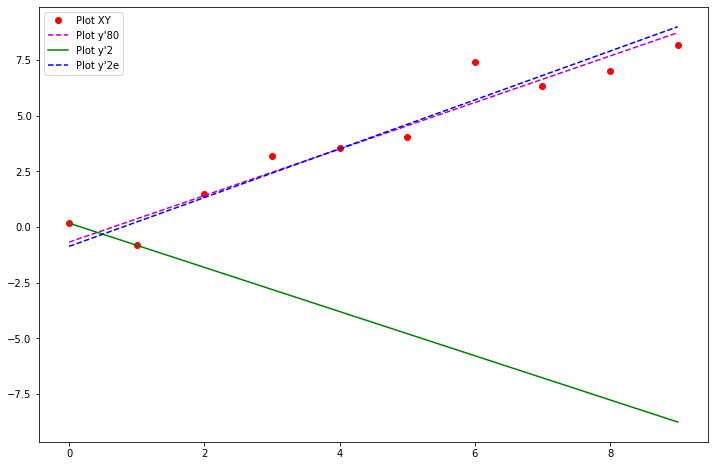

In [126]:
plt.figure(figsize= (12,8))
plt.plot(df["x"], df["y"], "ro")
plt.plot(df["x"], df["y'80"], "m--")
plt.plot(df["x"], df["y'2"], "g-")
plt.plot(df["x"], df["y'2e"], "b--")
plt.legend (["Plot XY", "Plot y'80", "Plot y'2", "Plot y'2e"])